<a href="https://colab.research.google.com/github/RamyaBalu-2000/Braintumourdetection/blob/main/braintumordetectionand_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install Kaggle
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json 
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Saving kaggle.json to kaggle.json
 60% 9.00M/15.1M [00:01<00:00, 8.30MB/s]
100% 15.1M/15.1M [00:01<00:00, 10.4MB/s]
Done


In [50]:
os.chdir('/content/yes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(128,128))
      X.append(img)
      y.append((i[0:1]))
os.chdir('/content/no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(128,128))
      X.append(img)
for i in range(1,99):
    y.append('N')

print(len(X))
print(len(y))


253
253


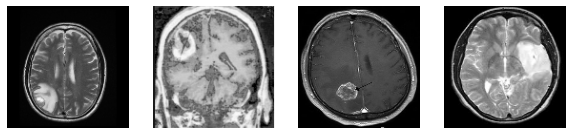

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)
print ("Shape of an image in X_train: ", len(y_train))
print ("Shape of an image in X_test: ", len(y_test))

Shape of an image in X_train:  (128, 128, 3)
Shape of an image in X_test:  (128, 128, 3)
Shape of an image in X_train:  169
Shape of an image in X_test:  84


In [53]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [54]:
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape) 
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (169, 128, 128, 3)
X_test Shape:  (84, 128, 128, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


In [55]:
m1=Sequential()
m1.add(BatchNormalization(input_shape = (128,128,3)))
m1.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (128, 128, 3))) 
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Dropout(0.25))
m1.add(Flatten()) 
m1.add(Dense(units=128,activation = 'relu'))
m1.add(Dense(units = 64, activation = 'relu'))
m1.add(Dense(units = 32, activation = 'relu'))
m1.add(Dense(units = 2, activation = 'softmax'))

In [56]:
m1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [57]:
history = m1.fit(X_train,y_train,
                    epochs=50, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/50
6/6 [==============================] - 3s 214ms/step - loss: 0.6950 - accuracy: 0.5417 - val_loss: 0.5226 - val_accuracy: 0.7262
Epoch 2/50
6/6 [==============================] - 0s 62ms/step - loss: 0.6588 - accuracy: 0.5583 - val_loss: 1.1896 - val_accuracy: 0.6190
Epoch 3/50
6/6 [==============================] - 0s 62ms/step - loss: 0.5389 - accuracy: 0.7160 - val_loss: 0.9117 - val_accuracy: 0.7738
Epoch 4/50
6/6 [==============================] - 0s 60ms/step - loss: 0.5679 - accuracy: 0.7750 - val_loss: 0.5863 - val_accuracy: 0.7500
Epoch 5/50
6/6 [==============================] - 0s 63ms/step - loss: 0.4548 - accuracy: 0.8135 - val_loss: 0.5484 - val_accuracy: 0.7619
Epoch 6/50
6/6 [==============================] - 0s 63ms/step - loss: 0.4281 - accuracy: 0.7988 - val_loss: 0.6620 - val_accuracy: 0.7857
Epoch 7/50
6/6 [==============================] - 0s 63ms/step - loss: 0.4340 - accuracy: 0.8180 - val_loss: 0.5733 - val_accuracy: 0.6667
Epoch 8/50
6/6 [==========

3/3 [==============================] - 0s 19ms/step - loss: 1.1200 - accuracy: 0.8690


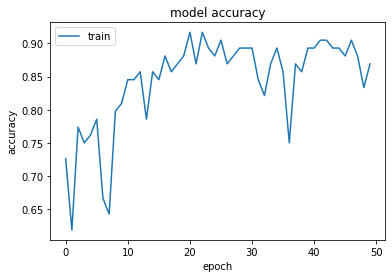

In [58]:
m1.evaluate(X_test,y_test)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


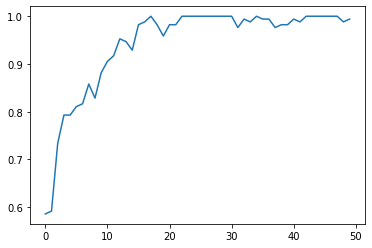

In [61]:
plt.plot(history.history['accuracy'])

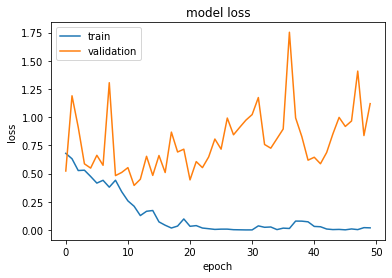

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


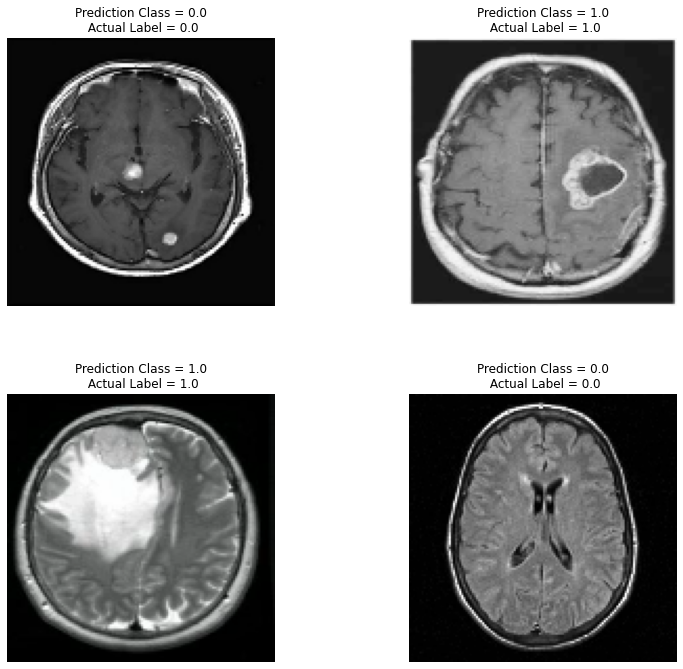

In [65]:
y_predicted=m1.predict_classes(X_test)
y_actual=np.argmax(y_test,axis=1)
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        33
           1       0.84      0.96      0.90        51

    accuracy                           0.87        84
   macro avg       0.88      0.84      0.86        84
weighted avg       0.88      0.87      0.87        84

